In [18]:
# Pytorch package
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from collections import Counter
from torch.nn.utils.rnn import pad_sequence
import os
import numpy as np
from plotly import graph_objects as go
import plotly.express as px
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cuda


## Data Pre-Processing, Visualization, Etc.



In [21]:
def load_dataset_labels_paths():
  test_dict = {}
  train_dict = {}

  for label in os.listdir('Testing'):
    for file in os.listdir(os.path.join('Testing', label)):
        if test_dict.get(label) is None:
            test_dict[label] = []
        test_dict[label].append(os.path.join('Testing', label, file))
          
  for label in os.listdir('Training'):
    for file in os.listdir(os.path.join('Training', label)):
        if train_dict.get(label) is None:
            train_dict[label] = []
        train_dict[label].append(os.path.join('Training', label, file))
        
  return train_dict, test_dict

def load_image(image_path):
  image = Image.open(image_path)
  image = image.resize((64, 64))
  image = np.array(image)
  image = torch.from_numpy(image).float()
  return image

In [22]:
# Display a couple random samples
train_paths_labels, test_paths_labels = load_dataset_labels_paths()
random_label = np.random.choice(list(train_paths_labels.keys()))
random_image_path = np.random.choice(train_paths_labels[random_label])
random_image = load_image(random_image_path)
display(random_image_path)
px.imshow(random_image, color_continuous_scale='gray').show()

'Training/glioma/Tr-gl_0065.jpg'

In [27]:


# Plot the dataset
def plot_dataset(dataset_type):

    base_directory = os.getcwd()
    categories = os.listdir(base_directory+'/'+dataset_type)

    path = os.path.join(base_directory, dataset_type)
    counts = [len(os.listdir(os.path.join(path, cat))) for cat in categories]

    plt.bar(categories, counts, color = ['navy', 'teal', 'darkorange', 'crimson'])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(f"{dataset_type.capitalize()} Set Distribution")
    plt.show()


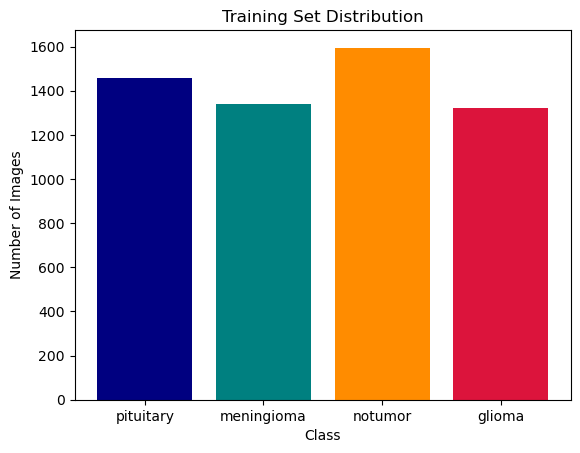

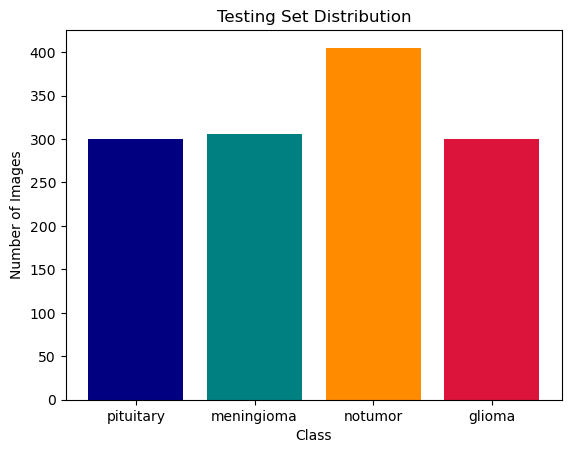

In [29]:
plot_dataset('Training')
plot_dataset('Testing')

## (Model 1) Custom CNN

In [17]:
train_paths_labels

{'pituitary': ['Training/pituitary/Tr-pi_0291.jpg',
  'Training/pituitary/Tr-pi_0473.jpg',
  'Training/pituitary/Tr-pi_0268.jpg',
  'Training/pituitary/Tr-pi_0924.jpg',
  'Training/pituitary/Tr-pi_1036.jpg',
  'Training/pituitary/Tr-pi_0964.jpg',
  'Training/pituitary/Tr-pi_0502.jpg',
  'Training/pituitary/Tr-pi_1338.jpg',
  'Training/pituitary/Tr-pi_0118.jpg',
  'Training/pituitary/Tr-pi_0869.jpg',
  'Training/pituitary/Tr-pi_0882.jpg',
  'Training/pituitary/Tr-pi_1066.jpg',
  'Training/pituitary/Tr-pi_1065.jpg',
  'Training/pituitary/Tr-pi_0035.jpg',
  'Training/pituitary/Tr-pi_0741.jpg',
  'Training/pituitary/Tr-pi_1207.jpg',
  'Training/pituitary/Tr-pi_0613.jpg',
  'Training/pituitary/Tr-pi_0658.jpg',
  'Training/pituitary/Tr-pi_0975.jpg',
  'Training/pituitary/Tr-pi_0481.jpg',
  'Training/pituitary/Tr-pi_1450.jpg',
  'Training/pituitary/Tr-piTr_0007.jpg',
  'Training/pituitary/Tr-pi_0958.jpg',
  'Training/pituitary/Tr-pi_1432.jpg',
  'Training/pituitary/Tr-pi_0226.jpg',
  'Trainin

## (Model 2) ResNet

## Gradient Visualization